# Project: China Scientific Leadership

**Notebook:** Fig4_a_China_International_Student_Budget.ipynb

**Authors:** Renli Wu, Christopher Esposito, James Evans

**Affiliations:** School of Information Management, Wuhan University / Knowledge Lab, University of Chicago / University of California, Los Angeles

**Date:** 2024-11-29 (UTC)
**Version:** v0.3.0

**Purpose:**
This notebook generates **Figure 4a** for the main text. The data are drawn from the annual departmental budgets published on the official website of the Chinese Ministry of Education.

**Inputs:**
- `data/China_Budget_for_International_Students.csv`

**Outputs:**
- `pics/fig_4_a.svg`

**Notes:**
See `README.md` for details on environment setup, dependencies, and execution order within the full analysis pipeline.


In [1]:
import numpy as np
import pandas as pd
import time

### Read China's Budget data

In [2]:
%%time
print(time.strftime('%l:%M%p %Z on %b %d, %Y'))
df = pd.read_csv("./data/China_Budget_for_International_Students.csv")
print(time.strftime('%l:%M%p %Z on %b %d, %Y'), df.shape)
df.tail()

 6:30AM CDT on Sep 17, 2025
 6:30AM CDT on Sep 17, 2025 (14, 3)
CPU times: user 4.13 ms, sys: 67 µs, total: 4.2 ms
Wall time: 4.27 ms


,Year,China's Budget for International Students in China,China's Budget for Chinese Students Abroad
9,2021,3335001500,5764909400
10,2022,1074167000,5233327200
11,2023,1274846300,4214776100
12,2024,2064368300,3112025300
13,2025,1636495700,4599581000


### Line Charts of Budget Statistics

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.interpolate import make_interp_spline

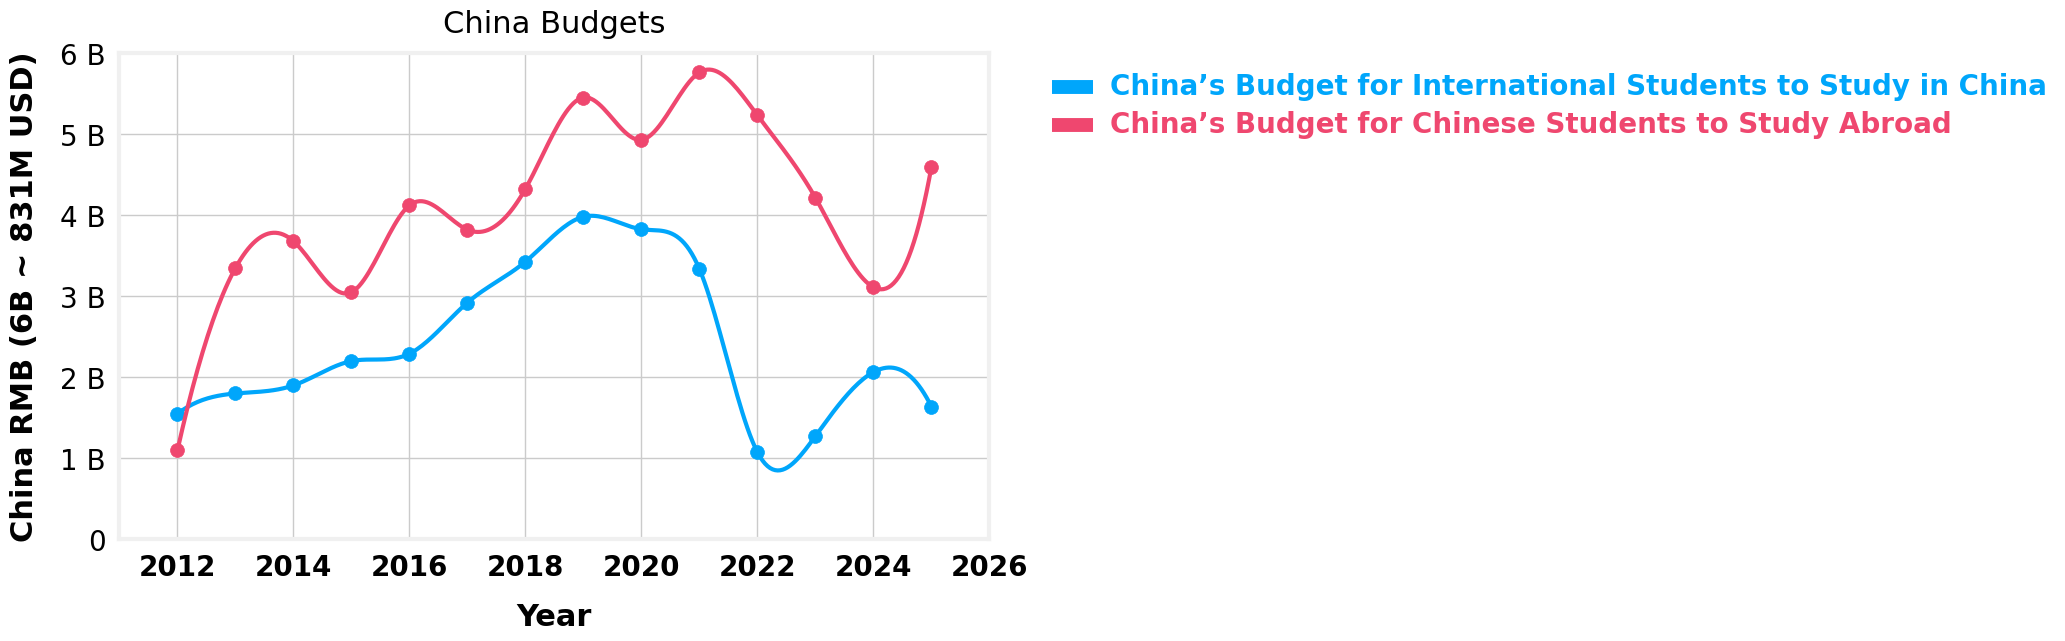

In [4]:
# --- Matplotlib style & canvas ---
plt.style.use("fivethirtyeight")
plt.rcParams["figure.facecolor"] = "white"

# --- Columns ---
col_year      = "Year"
col_inbound   = "China's Budget for International Students in China"
col_outbound  = "China's Budget for Chinese Students Abroad"

# --- Prepare series (sort by Year for smooth interpolation) ---
plot_df = df[[col_year, col_inbound, col_outbound]].dropna().sort_values(col_year)
x  = plot_df[col_year].to_numpy()
y1 = plot_df[col_inbound].to_numpy()
y2 = plot_df[col_outbound].to_numpy()

# --- Smooth curves (cubic spline; guard for short series) ---
xnew = np.linspace(x.min(), x.max(), 300)
k    = int(min(3, len(x) - 1))  # spline degree must be < len(x)
y1_smooth = make_interp_spline(x, y1, k=k)(xnew)
y2_smooth = make_interp_spline(x, y2, k=k)(xnew)


# --- Figure ---
fig = plt.figure(figsize=(10, 6))
ax  = plt.gca()
ax.set_facecolor("white")

# Colors
c_inbound  = "#00a6fb"
c_outbound = "#ef476f"

# Smooth lines
ax.plot(xnew, y1_smooth, color=c_inbound,  linewidth=3,
        label="China’s Budget for International Students to Study in China")
ax.plot(xnew, y2_smooth, color=c_outbound, linewidth=3,
        label="China’s Budget for Chinese Students to Study Abroad")

# Original points
ax.scatter(x, y1, color=c_inbound,  s=100, marker="o")
ax.scatter(x, y2, color=c_outbound, s=100, marker="o")

# Axes limits & labels
ax.set_xlim(2011, 2026)
ax.set_ylim(0, 6_000_000_000)

ax.set_xlabel("Year", labelpad=15, fontsize=22, weight="bold")
ax.set_title("China Budgets", pad=15, fontsize=22)
ax.set_ylabel("China RMB (6B ~ 831M USD)", fontsize=22,
              labelpad=15, weight="bold")

# --- Y-axis formatter with K/M/B suffixes ---
def _fmt_num(v, pos):
    if v >= 1_000_000_000:
        return f"{v/1_000_000_000:.0f} B"
    if v >= 1_000_000:
        return f"{v/1_000_000:.1f} M"
    if v >= 1_000:
        return f"{v/1_000:.1f} K"
    return f"{v:.0f}"

ax.yaxis.set_major_formatter(ticker.FuncFormatter(_fmt_num))

# Tick params & font
ax.tick_params(axis="both", which="both", pad=10)
for label in ax.get_yticklabels():
    label.set_fontsize(20)
for label in ax.get_xticklabels():
    label.set_fontsize(20)
    label.set_fontweight("bold")

# Legend
legend = ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left",
                   frameon=False, prop={"size": 15, "weight": "bold"})
for line, text in zip(legend.get_lines(), legend.get_texts()):
    line.set_linewidth(10)
    text.set_fontweight("bold")
    text.set_fontsize(20)
    text.set_color(line.get_color())
# Save
plt.savefig(f"./pics/fig_4_a.svg",
            facecolor="white", bbox_inches="tight", format="svg")
plt.show()